In [1]:
import numpy as np 
import matplotlib.pylab as plt
import numpy as np
from scipy.integrate import cumtrapz
from scipy.optimize import curve_fit
from importlib import reload
from matplotlib import rc
fontsize = 10
fontstyle = {
    "pdf.fonttype": 42, # type 3 pdf fonts
    "mathtext.default": 'regular', # italic math
    'mathtext.fontset': 'cm',
    'font.family' : 'STIXGeneral',
    "text.usetex": True, # latex-based math
    # sans-serif Helvetica font
    #"text.latex.preamble":
    #    r'\usepackage{helvet} \usepackage{sansmath} \sansmath',
    #"font.family": "sans-serif",
    # font sizes
    "axes.labelsize": fontsize,
    'axes.titlesize': fontsize,
    "font.size": fontsize,
    "legend.fontsize": fontsize,
    "xtick.labelsize": fontsize,
    'xtick.direction': "inout",
    'xtick.top': True,
    'xtick.major.size': 4,
    'xtick.major.width': 0.5,
    'xtick.minor.width': 0.5,
    "ytick.labelsize": fontsize,
    'ytick.direction': "inout",
    'ytick.right': True,
    'ytick.major.size': 4,
    'ytick.major.width': 0.5,
    'ytick.minor.width': 0.5,
    "axes.linewidth": 0.5,
    "text.latex.preamble":r'\usepackage{upgreek}' 
}

plt.rcParams.update(fontstyle)

c = 3e8
eps0 = 8.85e-12
import sys
sys.path.append("../src")
from tweezer_force import Domain
from matplotlib import cm
from matplotlib.colors import Normalize

import acoustic_entrainment
reload(acoustic_entrainment)
from acoustic_entrainment import mic_response, mic_response_pressure, muflown_phase, muflown_sensitivity, VelocityResponse


In [2]:
letters_lower = [r"$\mathrm{\bf{%s}}$" % lett for lett in "abcdefghijklmnopqrstuvwxyz"]
letters_round = [r"$\mathrm{\bf{(%s)}}$" % lett for lett in "abcdefghijklmnopqrstuvwxyz"] 
letters_upper = [r"$\bf{%s}$" % lett for lett in "abcdefghijklmnopqrstuvwxyz".upper()] 
letters_map = {"round": letters_round, "upper": letters_upper, "lower":letters_lower}  
def lettering(ax, x, y, num, color="k", mode="round", **kwargs):     
    letters = letters_map[mode]     
    ax.text(x, y, letters[num], weight="bold", transform=ax.transAxes,             
            horizontalalignment="center", verticalalignment="center", color=color, **kwargs)

In [3]:
T=300
eta=18e-6
rho=1700
R=3e-6/2
k = 10e-6

1.9269696295998078 -0.52859497226154


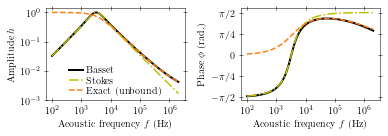

In [4]:
response = VelocityResponse(sensitivity=1, R=R, rho=rho, T=T, c0=344, k=k, rho_fluid=None)
fs = np.geomspace(1e2,2e6,100)
fig, axs = plt.subplots(1, 2, figsize=(5.5, 2), sharex=True)
for resp, label, color, ls, lw in zip(
                 ["bassetbound",  "stokesbound", "exact"],
                 ["Basset", "Stokes", "Exact (unbound)"],
                 ["k", "y", "C1"],
                 ["-", "-.", "--"],
                [2,1.5,1.5]):
    phase = response.phase(resp, fs)
    phase = (np.unwrap(2*phase)/2)
    if resp == "bassetbound":
        phase = phase #-  np.pi
    axs[0].loglog(fs, response.amplitude(resp, fs), label=label, c=color, ls=ls, lw=lw)
    axs[1].semilogx(fs, phase, label="Basset", c=color, ls=ls, lw=lw)
axs[0].set_ylabel(r"Amplitude $h$")
axs[1].set_ylabel(r"Phase $\phi$ (rad.)")
axs[0].set_xlabel("Acoustic frequency $f$ (Hz)")
axs[1].set_xlabel("Acoustic frequency $f$ (Hz)")
axs[0].minorticks_off()
axs[0].set_yticks([1e-3, 1e-2, 1e-1,1])
axs[1].set_yticks([-np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2])
axs[1].set_xticks([1e2, 1e3, 1e4, 1e5, 1e6])
axs[1].set_yticklabels([r"$-\pi/2$", r"$-\pi/4$", 0, r"$\pi/4$", r"$\pi/2$"]);
axs[0].legend(frameon=False, labelspacing=0.1, handletextpad=0.3, handlelength=1.4, loc = "lower left", bbox_to_anchor=(0.1,-0.05))
plt.tight_layout()
plt.savefig("figures/dissertation/transfer_function_air.pdf", dpi=600)
print(
        response.amplitude("bassetbound", 1e6) / response.amplitude("stokesbound", 1e6),
        (response.phase("bassetbound", 1e6) - response.phase("stokesbound", 1e6))
)

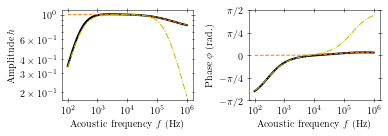

In [5]:
response = VelocityResponse(sensitivity=1, R=R, rho=rho, T=T, c0=1480, k=50e-6, rho_fluid=1e3, mu=1e-3)
fs = np.geomspace(1e2 ,1e6,100)
fig, axs = plt.subplots(1, 2, figsize=(5.5, 2), sharex=True)
for resp, color, ls, lw in zip(["bassetbound", "exact", "stokesbound"],
                 ["k", "C1", "y"],
                 ["-", "--", "-."],
                [2,1,1]):
    axs[0].loglog(fs, response.amplitude(resp, fs), label="Basset", c=color, ls=ls, lw=lw)
    phase = response.phase(resp, fs)
    axs[1].semilogx(fs, phase, label="Basset", c=color, ls=ls, lw=lw)
    
axs[0].set_ylabel(r"Amplitude $h$")
axs[1].set_ylabel(r"Phase $\phi$ (rad.)")
axs[0].set_xlabel("Acoustic frequency $f$ (Hz)")
axs[1].set_xlabel("Acoustic frequency $f$ (Hz)")
axs[1].set_yticks([-np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2])
axs[1].set_xticks([1e2, 1e3, 1e4, 1e5, 1e6])
#axs[0].set_yticks([1e-3, 1e-2, 1e-1,1])
axs[1].set_yticklabels([r"$-\pi/2$", r"$-\pi/4$", 0, r"$\pi/4$", r"$\pi/2$"]);
plt.tight_layout()
plt.savefig("figures/dissertation/transfer_function_water.pdf", dpi=600)

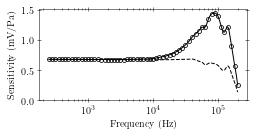

In [7]:
import matplotlib
from acoustic_entrainment import fs_orig
fig, ax = plt.subplots(1, 1, figsize=(3.66, 2), sharex=True)
fs = np.geomspace(fs_orig[0], fs_orig[-1], 10000)
ax.semilogx(fs_orig, 1e3*mic_response(fs_orig), marker="o", mec="k", mfc="none", mew=0.77, ms=4, ls="none")
ax.semilogx(fs, 1e3*mic_response(fs), c="k", lw=1);
ax.semilogx(fs, 1e3*mic_response_pressure(fs), c="k", lw=1, ls="--");
ax.set_yticks([0,0.5,1,1.5])
ax.set_ylabel("Sensitivity (mV/Pa)")
ax.set_xlabel("Frequency (Hz)")
plt.tight_layout()
plt.savefig("figures/dissertation/mic_sensitivity.pdf", dpi=600)

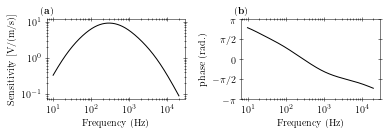

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(5.5, 2), sharex=True)
fs = np.geomspace(10, 20e3, 1000)
axs[0].plot(fs, muflown_sensitivity(fs), lw=1, c="k")
axs[1].plot(fs, muflown_phase(fs),lw=1, c="k")
axs[0].set_ylabel("Sensitivity [V/(m/s)]")
axs[1].set_ylabel("phase (rad.)")
axs[0].set_xlabel("Frequency (Hz)")
axs[1].set_xlabel("Frequency (Hz)")
axs[0].set_yscale("log")
for ax in axs:
    ax.set_xscale("log")
axs[0].tick_params(axis='x', which='minor')
axs[1].set_yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
axs[1].set_yticklabels([r"$-\pi$", r"$-\pi/2$", 0, r"$\pi/2$", r"$\pi$"]);
axs[0].set_xticks([1e1, 1e2, 1e3, 1e4])
locmin = matplotlib.ticker.LogLocator(base=10.0,
                                      subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),
                                      numticks=12)
axs[0].xaxis.set_minor_locator(locmin)
axs[0].xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

plt.tight_layout()
lettering(axs[0], 0, 1.1, 0)
lettering(axs[1], 0, 1.1, 1)
plt.tight_layout()
plt.savefig("figures/dissertation/muflown_sensitivity.pdf", dpi=600)

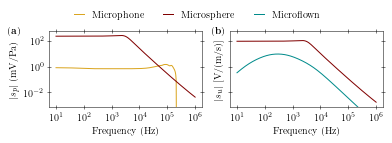

In [6]:

beta = 1.7e6
c0, cp, cu = "maroon", "goldenrod", "darkcyan"
m, mp, mu = "o", "s", ">" 


fig, axs = plt.subplots(1,2, figsize=(5.5, 1.8), sharex=True, sharey=True)
fs = np.geomspace(10, 1e6, 1000)
resp =  VelocityResponse(beta, R, rho, T, k, RH=50)

mask = mic_response(fs)>0
axs[0].plot(fs[mask], 1e3*mic_response(fs)[mask], c=cp, lw=1, label="Microphone");
axs[0].plot(fs, 1e3*resp.amplitude("bassetbound", fs)/(2*np.pi*fs)/resp.Z0, lw=1, c=c0)


axs[1].plot(fs, resp.amplitude("bassetbound", fs)/(2*np.pi*fs), lw=1, c=c0, label="Microsphere")
axs[1].plot(fs, muflown_sensitivity(fs), lw=1, c=cu, label="Microflown")

for ax in axs:
    ax.set_yscale("log")
    ax.set_xscale("log")
    ax.set_xlabel("Frequency (Hz)")
    ax.set_xticks([1e1, 1e2, 1e3, 1e4, 1e5, 1e6])
    ax.set_ylim(bottom=7e-4)
    ax.set_yticks([1e2, 1e0, 1e-2, ])
axs[0].set_ylabel(r"$|s_p|~{(\rm mV/Pa)}$")
axs[1].set_ylabel(r"$|s_u|~{[\rm V/(m/s)]}$")

handles,labels = [],[]
for ax in axs:
    for h,l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)

plt.tight_layout(pad=1)
plt.subplots_adjust(bottom=0.23, top=0.82)
fig.legend(handles, labels, frameon=False, handlelength=1, ncols=3, loc="upper center",
          bbox_to_anchor=(0.5, 1.05))
lettering(axs[0], -0.23, 1, 0)
lettering(axs[1], -0.08, 1, 1)
#plt.savefig("figures/dissertation/sensitivity_compare.pdf", dpi=600)

In [7]:
from scipy.integrate import cumtrapz
from constants import kB

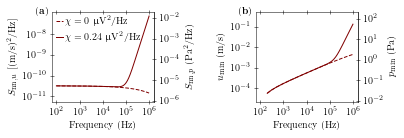

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(5.5, 1.8), sharex=True)
fs = np.linspace(100, 1e6, 10000)
chis = np.array([0, 2.4e-13]) / beta**2
resp =  VelocityResponse(1, R, rho, T, k, RH=50)
def utop2(u):
    return   u*resp.Z0**2
def ptou2(p):
    return   p/resp.Z0**2
def utop(u):
    return   u*resp.Z0
def ptou(p):
    return   p/resp.Z0
labels = [r"$\chi = 0~{\rm \upmu V^2/Hz}$", r"$\chi=0.24~{\rm \upmu V^2/Hz}$"]
for chi, ls, label in zip(chis, ["--", "-"], labels):
    Snnu = (2*np.pi*fs)**2 * resp.Sx_basset(fs, chi=chi) / resp.amplitude("bassetbound", fs)**2
    axs[0].loglog(fs, Snnu, ls=ls, lw=1, c=c0, label=label)
    axs[1].loglog(fs[1:], np.sqrt(cumtrapz(Snnu, x=fs)), ls=ls, lw=1, c=c0)
ax02 =  axs[0].secondary_yaxis('right', functions=(utop2,  ptou2))
ax12  = axs[1].secondary_yaxis('right', functions=(utop,  ptou))

axs[0].set_ylabel(r"$S_{{\rm nn},u}~[({\rm m/s})^2/{\rm  Hz}]$")
axs[0]. tick_params(right=False)
axs[0].set_yticks([1e-11, 1e-10, 1e-9, 1e-8])
axs[0].set_xticks([1e2, 1e3, 1e4, 1e5, 1e6])
axs[0].set_ylim(bottom=5e-12)
ax02.set_ylabel(r"$S_{{\rm nn},p}~({\rm Pa}^2/{\rm  Hz})$")
ax02.set_yticks([1e-6, 1e-5,1e-4, 1e-3,   1e-2])
axs[0].set_xlabel("Frequency (Hz)")

axs[1].set_ylabel(r"$u_{\rm min}~{\rm (m/s)}$")
axs[1].tick_params(right=False)
axs[1].set_yticks([1e-4, 1e-3, 1e-2, 1e-1])
ax12.set_ylabel(r"$p_{\rm min}~{\rm (Pa)}$") 
ax12.set_yticks([1e-2,1e-1, 1e0, 1e1, 1e2])
axs[1].set_ylim(2e-5, 5e-1)
axs[1].set_xlabel("Frequency (Hz)")
ax12.minorticks_off()
ax02.minorticks_off()
axs[0].minorticks_off()
axs[1].minorticks_off()

axs[0].legend(frameon=False, handlelength=0.7, handletextpad=0.2, loc="upper center",
              bbox_to_anchor=(0.46, 1.05))


lettering(axs[0], -0.1, 1, 0)
lettering(axs[1], -0.1, 1, 1)
plt.tight_layout(pad = 0.3)
plt.subplots_adjust(wspace=1)

#plt.savefig("figures/dissertation/acoustic_sensing_limits.pdf", dpi=600)

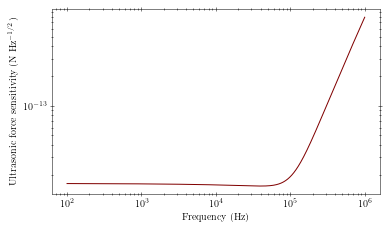

In [25]:
plt.figure(figsize=(5.5, 3.3))
Snnu = (2*np.pi*fs)**2 * resp.Sx_basset(fs, chi=chi) / resp.amplitude("bassetbound", fs)**2
plt.loglog(fs, np.sqrt(Snnu)*resp.Z0*(np.pi*resp.R**2), ls=ls, lw=1, c=c0, label=label)
plt.ylabel(r"Ultrasonic force sensitivity (N ${\rm Hz^{-1/2}}$)")
plt.xlabel("Frequency (Hz)")
plt.tight_layout()
plt.savefig("figures/force_sensitivity.pdf")

In [136]:
f = np.array([19.9, 20])
20*np.log10(np.sqrt(cumtrapz((2*np.pi*f)**2 * resp.Sx_basset(f, chi=chi) / resp.amplitude("bassetbound", f)**2, f))/20e-6
           )

array([-20.98778245])

In [137]:
1500/30

50.0

In [135]:
(0.1*resp.Z0**2 * 4*kB*resp.T/resp.gamma)

5.313676660424688e-07

In [90]:
np.log10(1e-3**2/420 * 3.1415 * (1.5e-6)**2 / 1e-12)

-7.77392970823458

In [95]:
-60 - 10 * np.log10(2*np.pi*(60e-9)**2)

76.45517630874596

In [114]:
PP = 1
10*np.log10( 1000*1480 * (1.8*1e-9 * 9e-6 / (6*1e-3))**2 / (2*np.pi) / 1e-12)

-57.65190624645183

In [117]:
20 * 20e-6 * 10**(76/20)

2.523829377920772

In [118]:
1000*1480 * (1.8*1e-9 * 9e-6 / (6*1e-3))**2 / (2*np.pi)

1.7171545120070778e-18

In [120]:
np.sqrt(2*1.72e-18 * 1.4e6/(np.pi*(60e-9)**2))

20.6355976938796